Initialization

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os

#Creating directories
raw_data_dir = r"E:\AIML_Project\data\raw"
processed_dir = r"E:\AIML_Project\results\outputs"
eda_ev_dir = r"E:\AIML_Project\results\eda_visualizations"

In [2]:
#Loading the dataset

df = pd.read_csv("E:/AIML_Project/data/raw/adult.data", header=None)

display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Encoding - Assigned to IT24102121

In [3]:
#Binary Encoding

# Load from previous (balanced)
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102123_balanced_train.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102123_balanced_test.csv'))

#Displaying initial income distribution
print("Before binary encoding:")
print("Training set income distribution:\n", df_train['income'].value_counts())
print("\nTest set income distribution:\n", df_test['income'].value_counts())

# Binary encode the income column ('<=50K' -> 0, '>50K' -> 1)
df_train['income'] = df_train['income'].map({'<=50K': 0, '>50K': 1})
df_test['income'] = df_test['income'].map({'<=50K': 0, '>50K': 1})

# Verify encoding and class balance
print("\nAfter binary encoding:")
print("Training set income distribution:\n", df_train['income'].value_counts())
print("\nTest set income distribution:\n", df_test['income'].value_counts())
print("\nTraining dtypes:\n", df_train.dtypes)

# Save datasets with encoded income
df_train.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(01).csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(01).csv'), index=False)
print("\nSaved datasets with encoded income to processed directory.")

Before binary encoding:
Training set income distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

Test set income distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

After binary encoding:
Training set income distribution:
 income
1    3700
0    3700
Name: count, dtype: int64

Test set income distribution:
 income
1    3700
0    3700
Name: count, dtype: int64

Training dtypes:
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income             int64
dtype: object

Saved datasets with encoded income to processed directory.


All numerical columns found in dataset.

NaN counts per column:
age               0
education_num     0
hours_per_week    0
income            0
dtype: int64

Variance per column:
age               160.411154
education_num       6.731307
hours_per_week    141.075247
income              0.250034
dtype: float64

Correlation matrix shape: (4, 4)


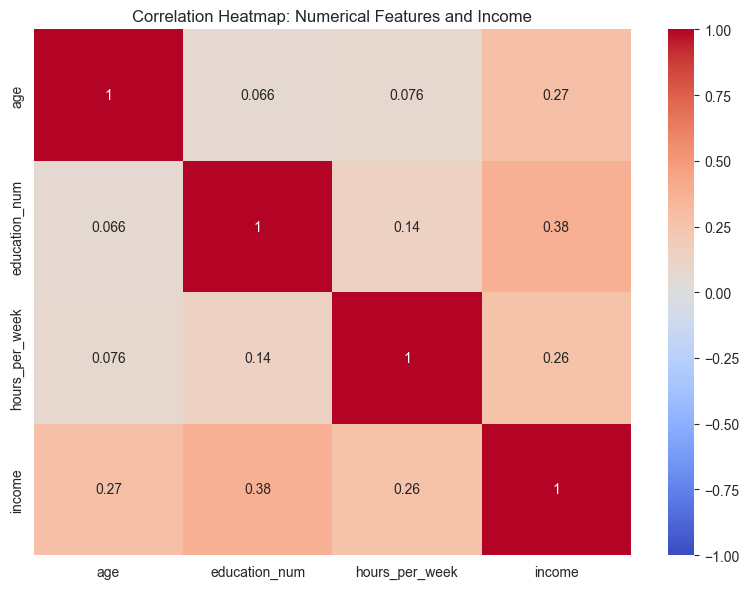

 Heatmap for numerical features saved to E:\AIML_Project\results\eda_visualizations\heatmap_numerical.png.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the encoded training dataset
df_train_encoded = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(01).csv'))

# Define numerical columns to include
numerical_cols = ['age', 'education_num', 'hours_per_week', 'income']

# Verify columns exist and select data
missing_cols = [col for col in numerical_cols if col not in df_train_encoded.columns]
if missing_cols:
    print(f"Warning: Missing columns in dataset: {missing_cols}")
else:
    print("All numerical columns found in dataset.")

df_numerical = df_train_encoded[numerical_cols]

# Check for NaN values or zero variance
print("\nNaN counts per column:")
print(df_numerical.isna().sum())
print("\nVariance per column:")
print(df_numerical.var())

# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Verify matrix shape
print("\nCorrelation matrix shape:", corr_matrix.shape)

# Create heatmap with explicit axis limits
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap: Numerical Features and Income')
plt.tight_layout()

# Save the heatmap
heatmap_path = os.path.join(eda_ev_dir, 'heatmap_numerical.png')
plt.savefig(heatmap_path)
plt.show()
print(f" Heatmap for numerical features saved to {heatmap_path}.")

In [5]:
#One hot Encoding

#All the nominal column are selected to do one-hot-encoding

# Load the datasets with encoded income
df_train = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(01).csv'))
df_test = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(01).csv'))

# Display initial shapes and dtypes
print("Before one-hot encoding:")
print("Training set shape:", df_train.shape)
print("Test set shape:", df_test.shape)
print("\nTraining dtypes:\n", df_train.dtypes)

# Define categorical columns to one-hot encode
categorical_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Apply one-hot encoding to categorical columns
df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Convert boolean values to integers (True -> 1, False -> 0)
for column in df_train_encoded.columns:
    if df_train_encoded[column].dtype == 'bool':
        df_train_encoded[column] = df_train_encoded[column].astype(int)
for column in df_test_encoded.columns:
    if df_test_encoded[column].dtype == 'bool':
        df_test_encoded[column] = df_test_encoded[column].astype(int)

# Align test set columns to train set, filling missing with 0
train_columns = df_train_encoded.columns
df_test_encoded = df_test_encoded.reindex(columns=train_columns, fill_value=0)

# Verify shapes and dtypes after encoding
print("\nAfter one-hot encoding:")
print("Training set shape:", df_train_encoded.shape)
print("Test set shape:", df_test_encoded.shape)
print("\nTraining dtypes:\n", df_train_encoded.dtypes)

# Check for non-numeric columns
non_numeric_cols = df_train_encoded.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\nWarning: Non-numeric columns remain in training set:", non_numeric_cols.tolist())
else:
    print("\nAll columns in training set are numeric.")

# Confirm class balance
print("\nTraining set income distribution:\n", df_train_encoded['income'].value_counts())
print("Test set income distribution:\n", df_test_encoded['income'].value_counts())

# Save fully encoded datasets
df_train_encoded.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(02).csv'), index=False)
df_test_encoded.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(02).csv'), index=False)
print("\nSaved fully encoded datasets to processed directory.")

Before one-hot encoding:
Training set shape: (7400, 11)
Test set shape: (7400, 11)

Training dtypes:
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income             int64
dtype: object

After one-hot encoding:
Training set shape: (7400, 78)
Test set shape: (7400, 78)

Training dtypes:
 age                               int64
education_num                     int64
hours_per_week                    int64
income                            int64
workclass_Local-gov               int64
                                  ...  
native_country_Thailand           int64
native_country_Trinadad&Tobago    int64
native_country_United-States      int64
native_country_Vietnam            int64
native_country_Yugoslavia         int64
Length: 78, dtype: object

All columns in training set are numeric.

In [6]:
from sklearn.model_selection import train_test_split

# Load the encoded datasets
df_train_encoded = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_train(02).csv'))
df_test_encoded = pd.read_csv(os.path.join(processed_dir, 'IT_24102121_encoded_test(02).csv'))

# Combine the datasets
combined_df = pd.concat([df_train_encoded, df_test_encoded], axis=0, ignore_index=True)

# Display combined dataset info
print("Combined dataset shape:", combined_df.shape)
print("\nCombined dataset income distribution:\n", combined_df['income'].value_counts())

# Split into 80% train and 20% test with stratification
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, stratify=combined_df['income'])

# Verify split shapes and class distribution
print("\nAfter 80-20 split:")
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTraining set income distribution:\n", train_df['income'].value_counts())
print("\nTest set income distribution:\n", test_df['income'].value_counts())

# Save after 80/20 split
train_df.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_train.csv'), index=False)
test_df.to_csv(os.path.join(processed_dir, 'IT_24102121_encoded_80_20_test.csv'), index=False)
print("Saved encoded and split datasets to processed directory.")

Combined dataset shape: (14800, 78)

Combined dataset income distribution:
 income
1    7400
0    7400
Name: count, dtype: int64

After 80-20 split:
Training set shape: (11840, 78)
Test set shape: (2960, 78)

Training set income distribution:
 income
0    5920
1    5920
Name: count, dtype: int64

Test set income distribution:
 income
1    1480
0    1480
Name: count, dtype: int64
Saved encoded and split datasets to processed directory.
